In [34]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import _rebuild
_rebuild()
mpl.rcParams["font.sans-serif"]=[u"SimHei"]
mpl.rcParams["axes.unicode_minus"]=False

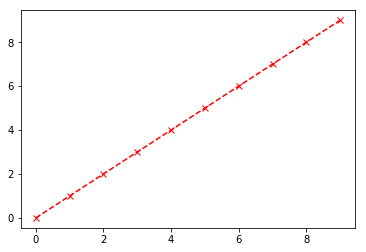

In [12]:
#线图
def fun1():
    #先获取x轴和y轴的值
    x=np.arange(10)
    y=x
    #获取画布
    plt.figure()
    #绘制线图，调用plot函数
    plt.plot(x,y,'--x',color='r')
    
fun1()

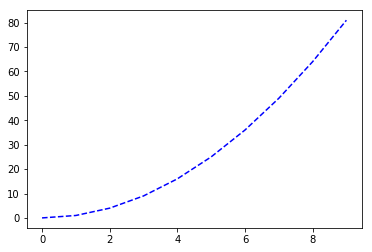

In [15]:
def fun2():
    x=np.arange(10)
    y=x ** 2
    plt.figure()
    plt.plot(x,y,'--',color='b')
fun2()

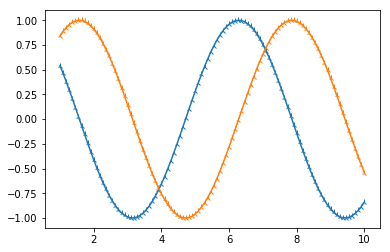

In [19]:
def fun3():
    #x的点，从1到10取100个数，这100个数是等差的
    x=np.linspace(1,10,100)
    y=np.cos(x)
    z=np.sin(x)
    plt.figure()
    plt.plot(x,y,"-2")
    plt.plot(x,z,"-2")
fun3()

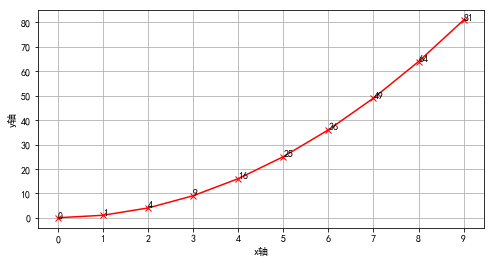

In [33]:
def fun4():
    x=np.arange(10)
    y=x ** 2
    #设置画布的尺寸，宽8英寸，高4英寸
    plt.figure(figsize=(8,4))
    plt.plot(x,y,"-x",color='r')
    plt.xlabel('x轴')
    plt.ylabel('y轴')
    
    #修改刻度
    plt.xticks(np.arange(0,10))
    #plt.xticks(np.arange(0,10),["a","b","c","d","e","f","g","h","i","j"])
    
    #如果想要添加文字，需要先调用gca获取当前坐标系
    ax=plt.gca() #gca=> get current axis
    
    for i,j in zip(x,y): #(1,2,3) (1,4,9) -> [(1,1),(2,4),(3,9)]
        #text()在当前坐标系中添加文字
        ax.text(i,j,j) #i,j添加在哪个坐标点上，j添加什么文字
    
    #在当前画布中添加表格背景
    plt.grid(True)
fun4()

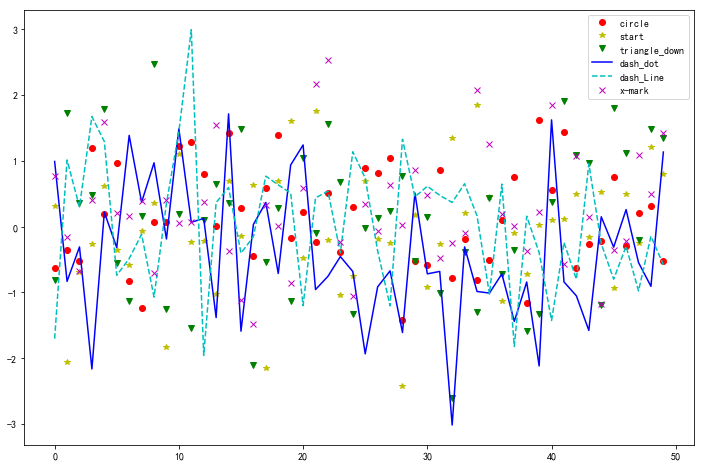

In [41]:
#画6条线图，每条线的样式不同，颜色不同，线的轨迹要使用随机数，并且要符合正态分布
def fun5():
    x=np.arange(50)
    #列表中存放6种颜色
    colors=["r","y","g","b","c","m"]
    #字典中存放6条线的不同样式
    kind = {"circle":"o","start":"*","triangle_down":"v","dash_dot":"-","dash_Line":"--","x-mark":"x"}
    plt.figure(figsize=(12,8))
    for index,key in zip(np.arange(6),kind.keys()):
        #符合正态分布的随机数
        y=np.random.randn(50)
        plt.plot(x,y,kind[key],color=colors[index],label=key)
    plt.legend() #图例。搭配label=key用
fun5()


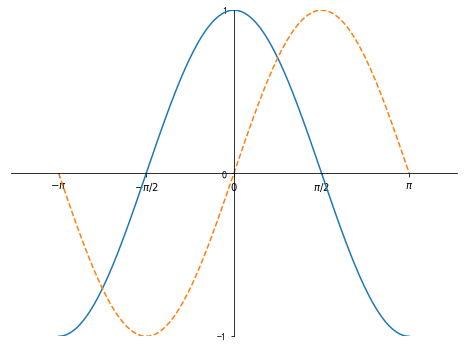

In [54]:
def fun6():
    x=np.linspace(-np.pi,np.pi,256)
    c=np.cos(x)
    s=np.sin(x)
    plt.figure(figsize=(8,6))
    plt.plot(x,c,"-")
    plt.plot(x,s,"--")
    
    #指定x轴和y轴的取值范围
    plt.xlim([-4,4])
    plt.ylim([-1,1])
    
    #修改刻度
    plt.yticks([-1,0,1])
    plt.xticks([-np.pi,-np.pi/2,0,np.pi,np.pi/2],[r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi$",r"$\pi/2$"]) #转义字符  r斜体
    
    #去除上、右边框
    ax=plt.gca()
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    
    #将底边框移到0点位置
    ax.spines['bottom'].set_position(("data",0))  #data 固定传入data
    
    #将左边框移到右侧0点位置
    ax.spines['left'].set_position(("data",0))
    
fun6()

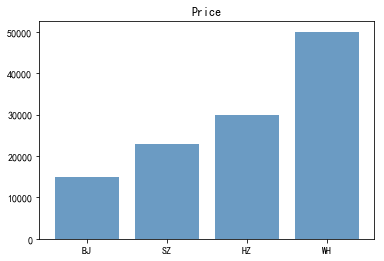

In [57]:
#纵向柱状图
def fun7():
    price = [15000,23000,30000,50000]
    #第一个参数表示x的点，第二个参数表示y的点
    plt.bar(np.arange(4),price,align="center",color='steelblue',alpha=0.8)
    plt.xticks(np.arange(4),["BJ","SZ","HZ","WH"])
    plt.title("Price")
fun7()

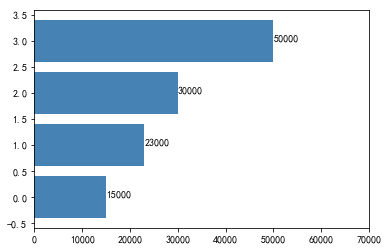

In [61]:
#横向柱状图
def fun8():
    price = [15000,23000,30000,50000]
    #第一个参数表示y的点，第二个参数表示x的点
    plt.barh(np.arange(4),price,align="center",color='steelblue')
    plt.xlim([0,70000]) #加宽x轴范围
    
    for x,y in zip(np.arange(4),price):
        plt.text(y,x,y)
fun8()

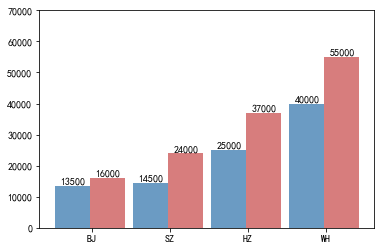

In [77]:
def fun9():
    y2017=[13500,14500,25000,40000]
    y2018=[16000,24000,37000,55000]
    labels=["BJ","SZ","HZ","WH"]
    #每根柱子的宽度
    bar_width=0.45
    plt.bar(np.arange(4), y2017, color='steelblue',alpha=0.8, width=bar_width)
    plt.bar(np.arange(4)+ bar_width, y2018, color='indianred',alpha=0.8, width=bar_width)
    
    plt.ylim([0,70000])
    plt.xticks([0.25,1.25,2.25,3.25],labels)
    
    #蓝柱子的文字
    for x,y in zip(np.arange(4),y2017):
        plt.text(x-0.15,y+500,y)
    #红柱子的文字
    for x,y in zip(np.arange(4),y2018):
        plt.text(x+0.3,y+500,y)
fun9()

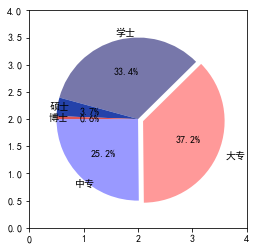

In [92]:
#饼图
def fun10():
    #就业率
    edu=[0.2515,0.3724,0.3336,0.0368,0.0057]
    #学历
    labels=['中专','大专','学士','硕士','博士']
    #饼的颜色
    colors=["#9999ff","#ff9999","#7777aa","#2442aa","#dd5555"]
    
    #将横纵坐标进行标准化的处理，保证饼图是正圆的
    plt.axes(aspect="equal")
    
    plt.xlim([0,4])
    plt.ylim([0,4])
    
    explode=[0,0.1,0,0,0]
    
    plt.pie(x=edu, #绘图数据
            labels=labels,  #数据标签
            colors=colors,  #饼的颜色
           autopct='%.1f%%',  #设置百分比，小数点后保留一位
            startangle=180,   #设置图的初始角度
            frame=1,  #默认是否显示边框
            center=(2,2), #设置饼图原点
            explode=explode,  #设置突出显示大专，将要突出显示的项赋一个特殊的值即可
            radius=1.5  #设置饼的半径
           )
    
fun10()

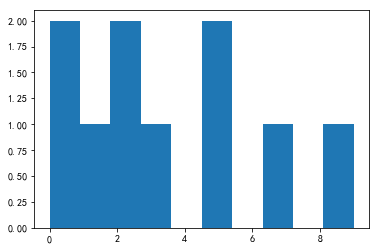

In [93]:
#直方图  类似柱状图，主要用来展示某个数值出现的概率
def fun11():
    x=np.random.randint(0,10,10)
    plt.hist(x,orientation="vertical") #horizontal
fun11()

[[0.09667502 0.48985851 0.84664299]
 [0.38915327 0.78005596 0.19019501]
 [0.81841285 0.41413087 0.88436203]
 ...
 [0.8264173  0.15350866 0.35679735]
 [0.2324235  0.92734378 0.59380166]
 [0.69187972 0.70511735 0.26146033]]


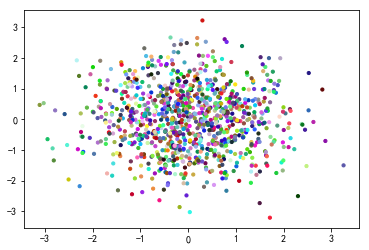

In [94]:
#散点图
def fun12():
    x=np.random.randn(1000)
    y=np.random.randn(1000)
    colors=np.random.random(3000).reshape((1000,3))
    print(colors)
    plt.scatter(x,y,color=colors,s=10)
fun12()

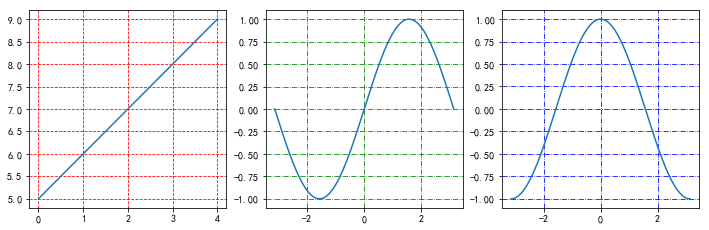

In [100]:
#子图，可以在一个画布中画多张图
def fun13():
    plt.figure(figsize=(12,8))
    
    a1=plt.subplot(2,3,1) #2行3列中的第一张图
    x1=np.arange(5)
    y1=x1+5
    a1.plot(x1,y1)
    a1.grid(color='r',linestyle='--')
    
    a2=plt.subplot(2,3,2)
    x2=np.linspace(-np.pi,np.pi,256)
    y2=np.sin(x2)
    a2.plot(x2,y2)
    a2.grid(color='g',linestyle='-.')
    
    a3=plt.subplot(2,3,3)
    x3=np.linspace(-np.pi,np.pi,256)
    y3=np.cos(x3)
    a3.plot(x3,y3)
    a3.grid(color='b',linestyle='-.')
fun13()

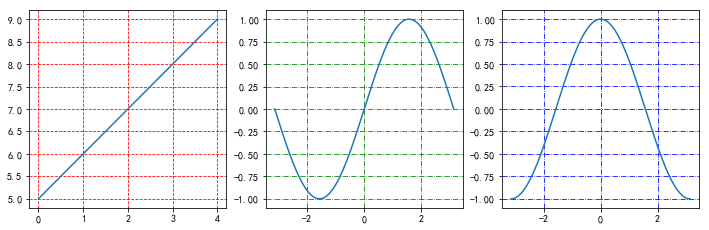

In [102]:
#保存图片
fun13()
#fname:保存图片的路径及名称
#dpi:分辨率，默认100
plt.savefig(fname='pic.jpg',dpi=500)